In [1]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "png"

In [2]:
from utils import compute_optimal_value_and_policy, simulate

In [3]:
T = 150
X = 10

value, policy = compute_optimal_value_and_policy(T, X)

In [4]:
# MAX EXPECTED REWARD FOR STARTING X = 5
print("Max expected reward of starting X = 5:", value[5][0])

Max expected reward of starting X = 5: 32.608869394070496


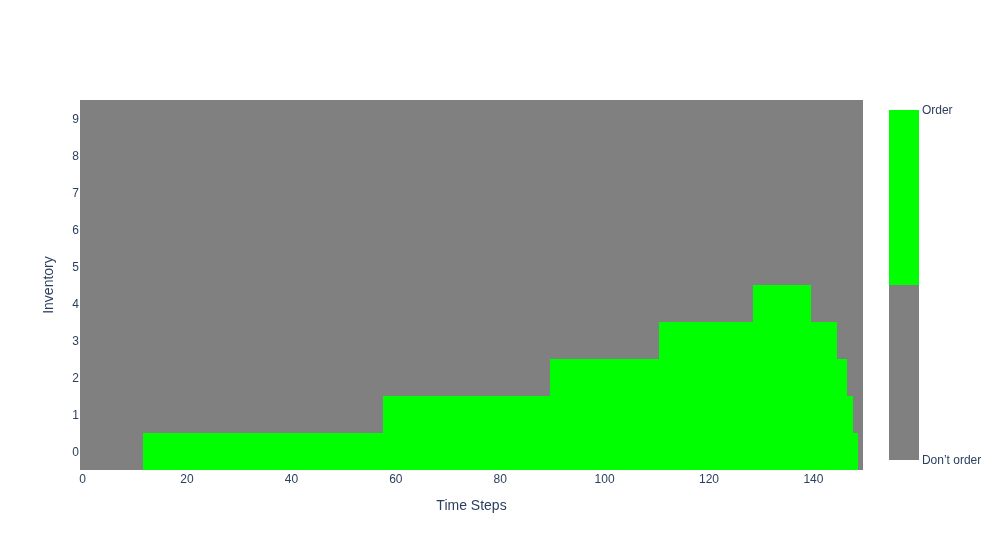

In [5]:
# PLOTTING THE OPTIMAL POLICY

fig = go.Figure()

colorscale = [[0, "grey"], [0.5, "grey"], [0.5, "lime"], [1, "lime"]]
fig.add_trace(
    go.Heatmap(
        z=policy,
        colorscale=colorscale,
        colorbar=dict(tickvals=[0, 1], ticktext=["Don’t order", "Order"]),
    )
)

fig.update_xaxes(title="Time Steps")
fig.update_yaxes(title="Inventory", tickvals=np.arange(X))

fig.update_layout(width=1000, height=550)

fig.show()

In [6]:
# SIMULATING
rewards = simulate(policy, starting_state=5, iter=1000)

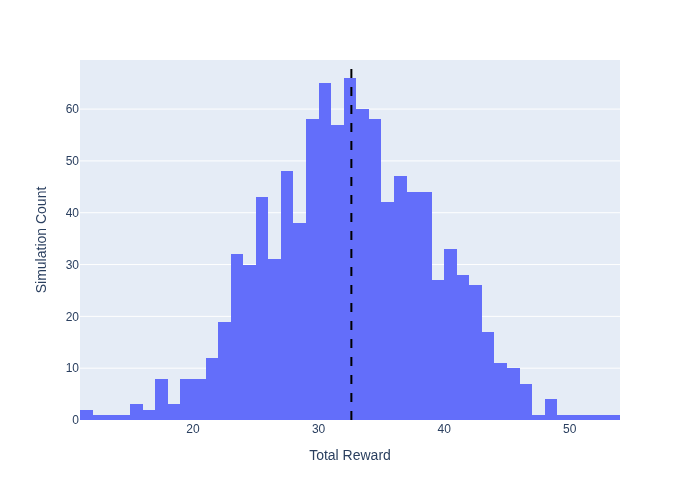

In [7]:
fig = px.histogram(rewards)

fig.add_vline(value[5][0], line_dash="dash", line_color="black")

fig.update_layout(showlegend=False)
fig.update_xaxes(title="Total Reward")
fig.update_yaxes(title="Simulation Count")

fig.show()